# Copper Price Forecasting - Exploratory Data Analysis (EDA)

This notebook performs EDA on the raw dataset for Copper Price Forecasting.
We will analyze the target variable (Copper Price), check for stationarity, and explore relationships with key macroeconomic indicators.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")

# Load Data
data_path = '../data/raw/copper_raw.csv'
df = pd.read_csv(data_path, index_col='Date', parse_dates=True)

# Display basic info
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (300, 12)


,Copper_Price,Gold_Price,DXY,SP500,NVDA,US_10yr_Yield,China_Manuf_Prod,US_Auto_Sales,PPI_All_Commodities,Aluminum_Price,AUD_USD,Oil_Price
Date,,,,,,,,,,,,
2000-01-01,NaN,NaN,105.129997,1394.459961,0.070792,6.661000,1.202876e+13,18.635,128.3,NaN,0.656030,27.259474
2000-02-01,NaN,NaN,105.919998,1366.420044,0.122244,6.519500,1.214509e+13,19.401,129.8,NaN,0.627755,29.366000
2000-03-01,NaN,NaN,105.440002,1498.579956,0.161371,6.256522,1.224844e+13,18.343,130.8,NaN,0.609383,29.841739
2000-04-01,NaN,NaN,110.139999,1452.430054,0.170235,5.990526,1.238407e+13,17.939,130.7,NaN,0.596025,25.722105
2000-05-01,NaN,NaN,108.739998,1420.599976,0.217987,6.440455,1.248496e+13,17.943,131.6,NaN,0.578359,28.788182


In [13]:
df.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 300 entries, 2000-01-01 to 2024-12-01
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Copper_Price         293 non-null    float64
 1   Gold_Price           293 non-null    float64
 2   DXY                  300 non-null    float64
 3   SP500                300 non-null    float64
 4   NVDA                 300 non-null    float64
 5   US_10yr_Yield        300 non-null    float64
 6   China_Manuf_Prod     300 non-null    float64
 7   US_Auto_Sales        300 non-null    float64
 8   PPI_All_Commodities  300 non-null    float64
 9   Aluminum_Price       264 non-null    float64
 10  AUD_USD              300 non-null    float64
 11  Oil_Price            300 non-null    float64
dtypes: float64(12)
memory usage: 30.5 KB


In [14]:
# Summary Statistics
df.describe()

,Copper_Price,Gold_Price,DXY,SP500,NVDA,US_10yr_Yield,China_Manuf_Prod,US_Auto_Sales,PPI_All_Commodities,Aluminum_Price,AUD_USD,Oil_Price
count,293.000000,293.000000,300.000000,300.000000,300.000000,300.000000,3.000000e+02,300.000000,300.000000,264.000000,300.000000,300.000000
mean,2.748206,1157.382593,92.529766,2116.563129,8.647904,3.283554,9.880934e+13,15.977590,188.178257,2069.192127,0.762351,63.653635
std,1.120808,582.070187,11.466646,1250.895988,22.990520,1.302189,6.647091e+13,2.203567,36.708436,424.571563,0.138749,25.336719
min,0.622000,257.899994,71.800003,735.090027,0.065401,0.623636,1.202876e+13,8.919000,128.100000,1334.290000,0.501595,16.547619
25%,2.125500,635.200012,82.247501,1206.157501,0.275280,2.200875,3.114416e+13,15.099000,164.225000,1752.896429,0.671751,44.276006
50%,2.951000,1245.500000,92.700001,1490.239990,0.451029,3.360952,9.157150e+13,16.624500,191.500000,2009.323702,0.743995,62.296522
75%,3.573500,1594.800049,99.760000,2726.792603,4.827605,4.269367,1.802589e+14,17.505750,203.625000,2381.439583,0.848043,81.995476
max,4.743000,2738.300049,120.239998,6032.379883,138.202682,6.661000,1.837570e+14,22.055000,280.251000,3498.373043,1.078065,133.880000


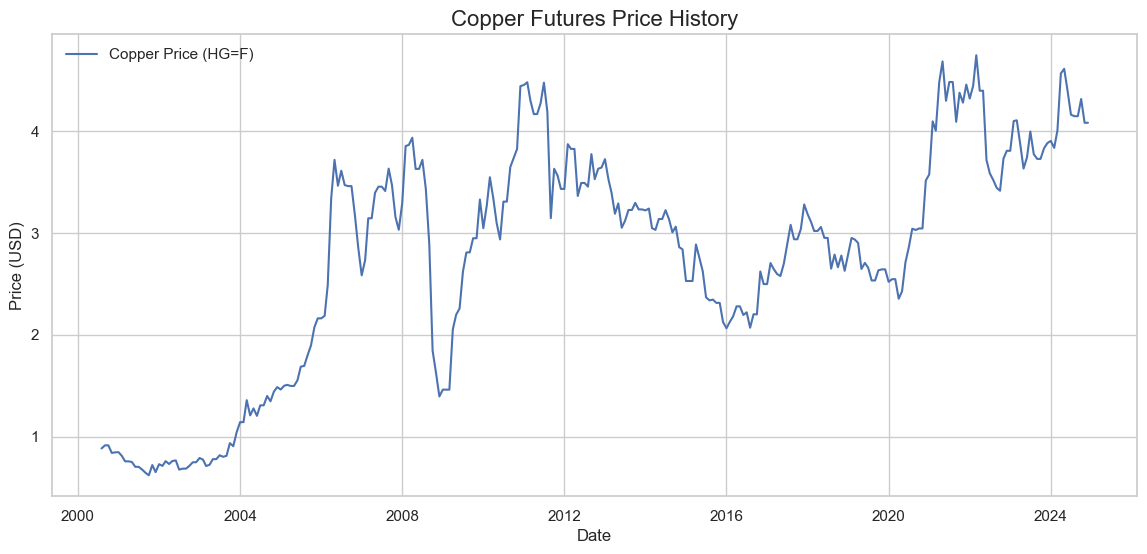

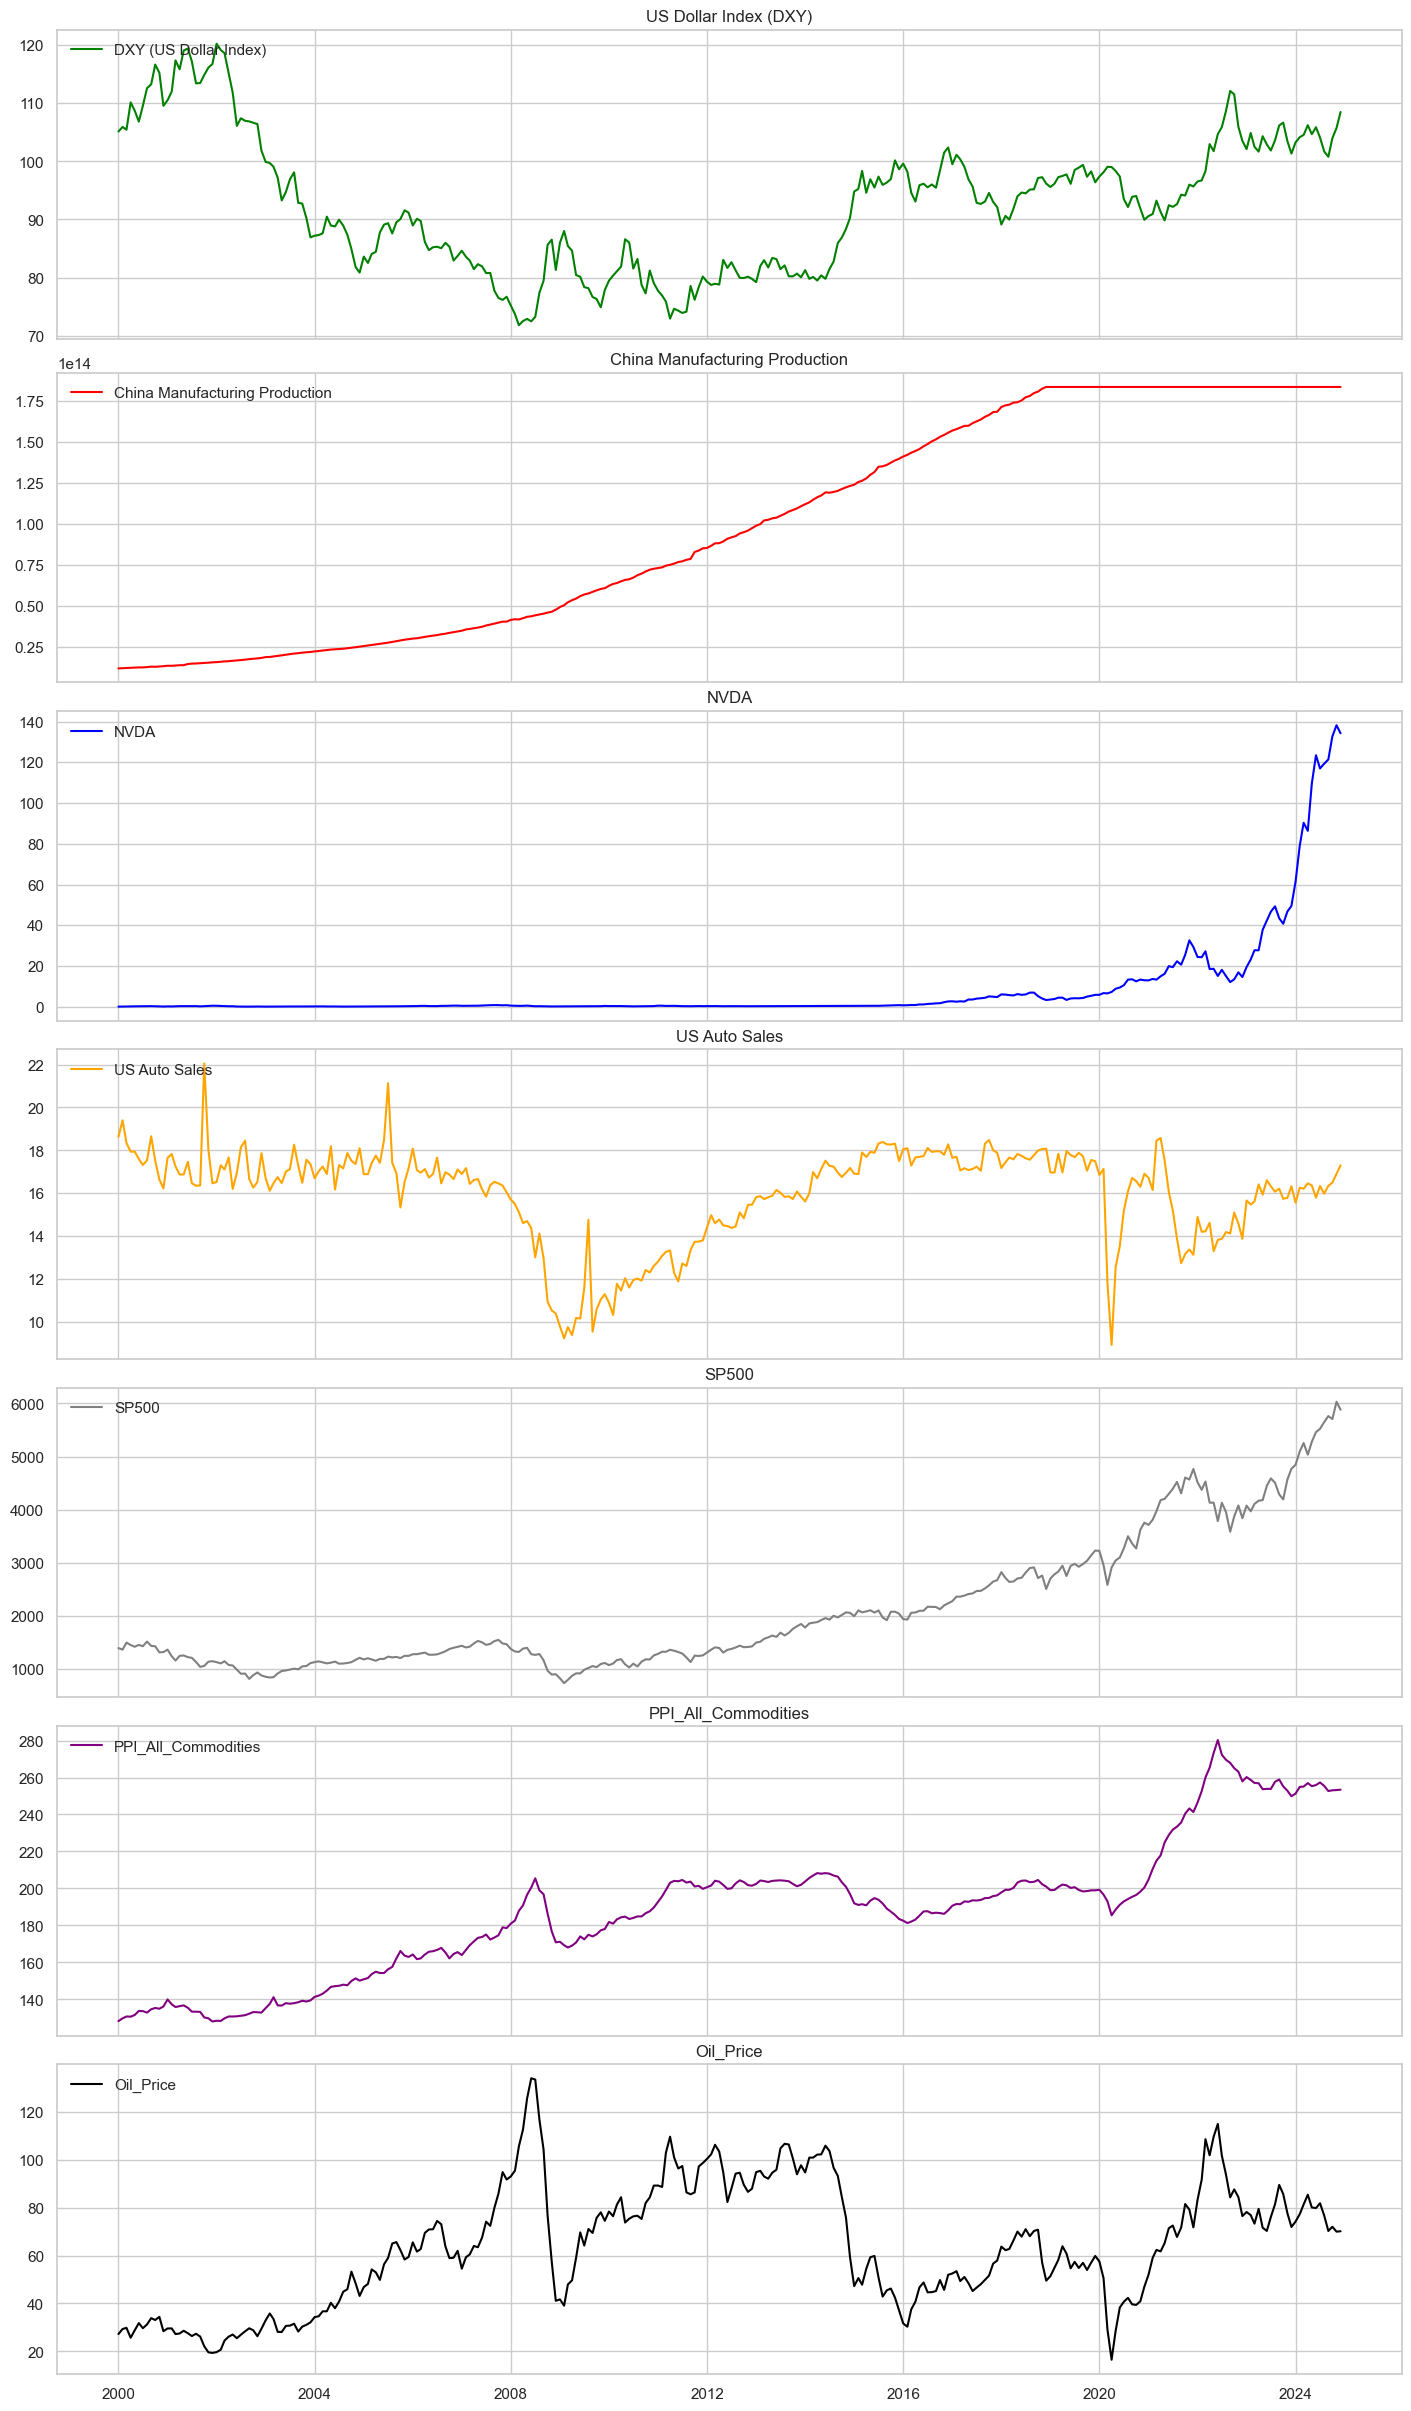

In [31]:
# Visualize Copper Price Over Time
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Copper_Price'], label='Copper Price (HG=F)')
plt.title('Copper Futures Price History', fontsize=16)
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend()
plt.show()

# Visualize Key Drivers
# Using constrained_layout=True helps prevent overlapping labels automatically
fig, axes = plt.subplots(7, 1, figsize=(14, 24), sharex=True, constrained_layout=True)

# 1. DXY
axes[0].plot(df.index, df['DXY'], color='green', label='DXY (US Dollar Index)')
axes[0].set_title('US Dollar Index (DXY)')
axes[0].legend(loc='upper left')

# 2. China Manufacturing
axes[1].plot(df.index, df['China_Manuf_Prod'], color='red', label='China Manufacturing Production')
axes[1].set_title('China Manufacturing Production')
axes[1].legend(loc='upper left')

# 3. NVDA
axes[2].plot(df.index, df['NVDA'], color='blue', label='NVDA')
axes[2].set_title('NVDA')
axes[2].legend(loc='upper left')

# 4. US Auto Sales
axes[3].plot(df.index, df['US_Auto_Sales'], color='orange', label='US Auto Sales')
axes[3].set_title('US Auto Sales')
axes[3].legend(loc='upper left')

# 5. SP500
axes[4].plot(df.index, df['SP500'], color='grey', label='SP500')
axes[4].set_title('SP500')
axes[4].legend(loc='upper left')

# 6. PPI
axes[5].plot(df.index, df['PPI_All_Commodities'], color='purple', label='PPI_All_Commodities')
axes[5].set_title('PPI_All_Commodities')
axes[5].legend(loc='upper left')

# 7. Oil Price
axes[6].plot(df.index, df['Oil_Price'], color='black', label='Oil_Price')
axes[6].set_title('Oil_Price')
axes[6].legend(loc='upper left')

plt.show()

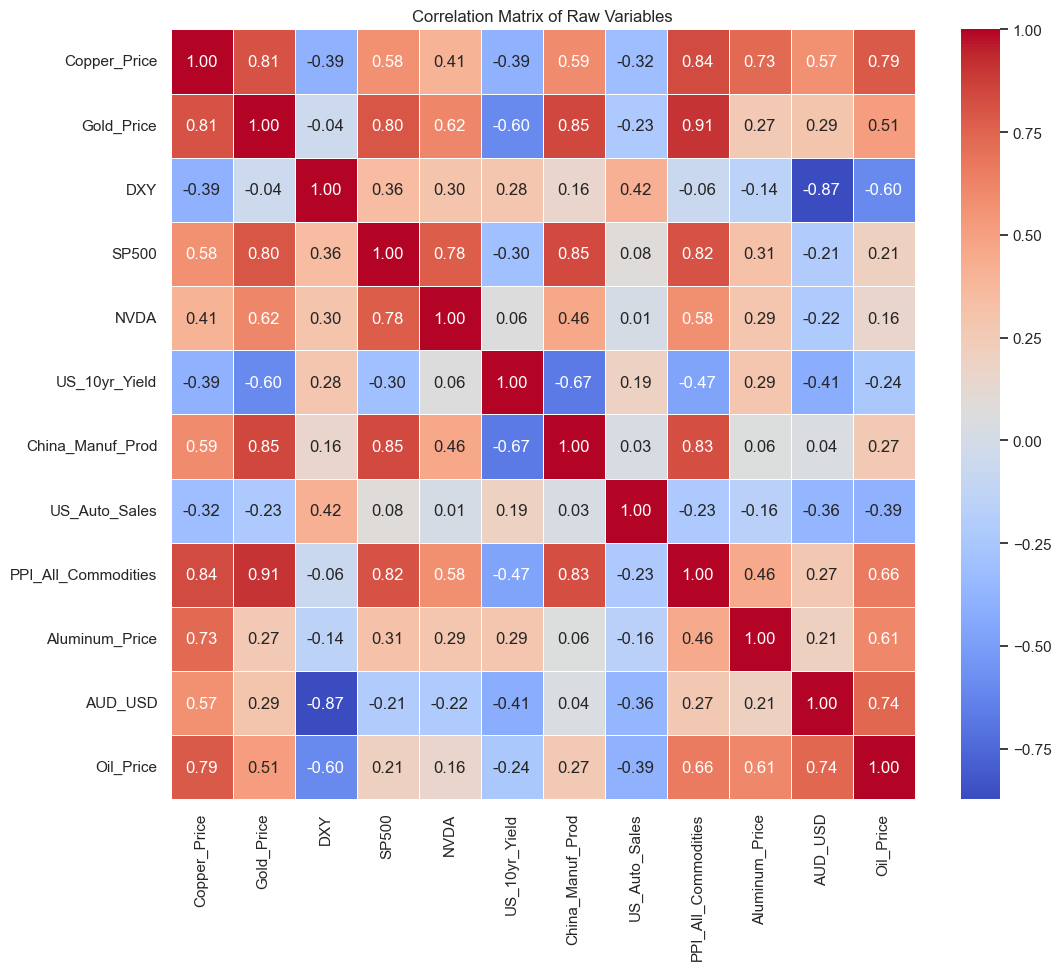

Correlation with Copper Price:

Copper_Price           1.000000
PPI_All_Commodities    0.837435
Gold_Price             0.811434
Oil_Price              0.786790
Aluminum_Price         0.734848
China_Manuf_Prod       0.594991
SP500                  0.575416
AUD_USD                0.568830
NVDA                   0.405563
US_Auto_Sales         -0.315049
US_10yr_Yield         -0.390155
DXY                   -0.392520
Name: Copper_Price, dtype: float64


In [16]:
# Correlation Analysis (Raw Data)
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Raw Variables')
plt.show()

# Top Correlations with Copper Price
print("Correlation with Copper Price:\n")
print(corr_matrix['Copper_Price'].sort_values(ascending=False))

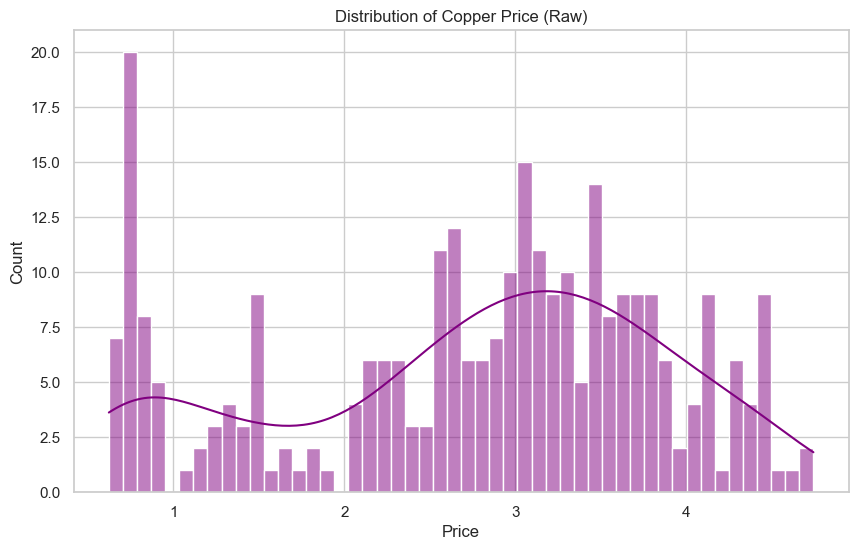

Skewness: -0.4537865692330731
Kurtosis: -0.7899904177347321


In [17]:
# Distribution of Copper Price (Raw)
plt.figure(figsize=(10, 6))
sns.histplot(df['Copper_Price'].dropna(), bins=50, kde=True, color='purple')
plt.title('Distribution of Copper Price (Raw)')
plt.xlabel('Price')
plt.show()

print("Skewness:", df['Copper_Price'].skew())
print("Kurtosis:", df['Copper_Price'].kurt())

In [37]:
# Stationarity Check (ADF Test) - Generalized for All Variables
def check_stationarity(timeseries, name):
    print(f"--- ADF Test for {name} ---")
    try:
        # Pass dropna() to avoid errors with leading/trailing NaNs
        result = adfuller(timeseries.dropna())
    except Exception as e:
        print(f"Error running ADF on {name}: {e}")
        return

    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    
    if result[1] <= 0.05:
        print("Result: Data is Stationary (reject H0)")
    else:
        print("Result: Data is Non-Stationary (fail to reject H0)")
    print("-" * 30)

# Check Stationarity for All Raw Variables (Levels)
print("=== Checking Raw Levels (Expect Non-Stationary) ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    check_stationarity(df[col], f"{col} (Level)")

print("\n\n=== Checking 1st Differences (Expect Stationary) ===")
# Check Stationarity for 1st Difference (Changes)
for col in numeric_cols:
    check_stationarity(df[col].diff(), f"{col} (1st Difference)")

=== Checking Raw Levels (Expect Non-Stationary) ===
--- ADF Test for Copper_Price (Level) ---
ADF Statistic: -1.9931
p-value: 0.2896
Result: Data is Non-Stationary (fail to reject H0)
------------------------------
--- ADF Test for Gold_Price (Level) ---
ADF Statistic: 0.4565
p-value: 0.9835
Result: Data is Non-Stationary (fail to reject H0)
------------------------------
--- ADF Test for DXY (Level) ---
ADF Statistic: -1.5697
p-value: 0.4988
Result: Data is Non-Stationary (fail to reject H0)
------------------------------
--- ADF Test for SP500 (Level) ---
ADF Statistic: 2.2346
p-value: 0.9989
Result: Data is Non-Stationary (fail to reject H0)
------------------------------
--- ADF Test for NVDA (Level) ---
ADF Statistic: 2.9363
p-value: 1.0000
Result: Data is Non-Stationary (fail to reject H0)
------------------------------
--- ADF Test for US_10yr_Yield (Level) ---
ADF Statistic: -2.3724
p-value: 0.1497
Result: Data is Non-Stationary (fail to reject H0)
-----------------------------

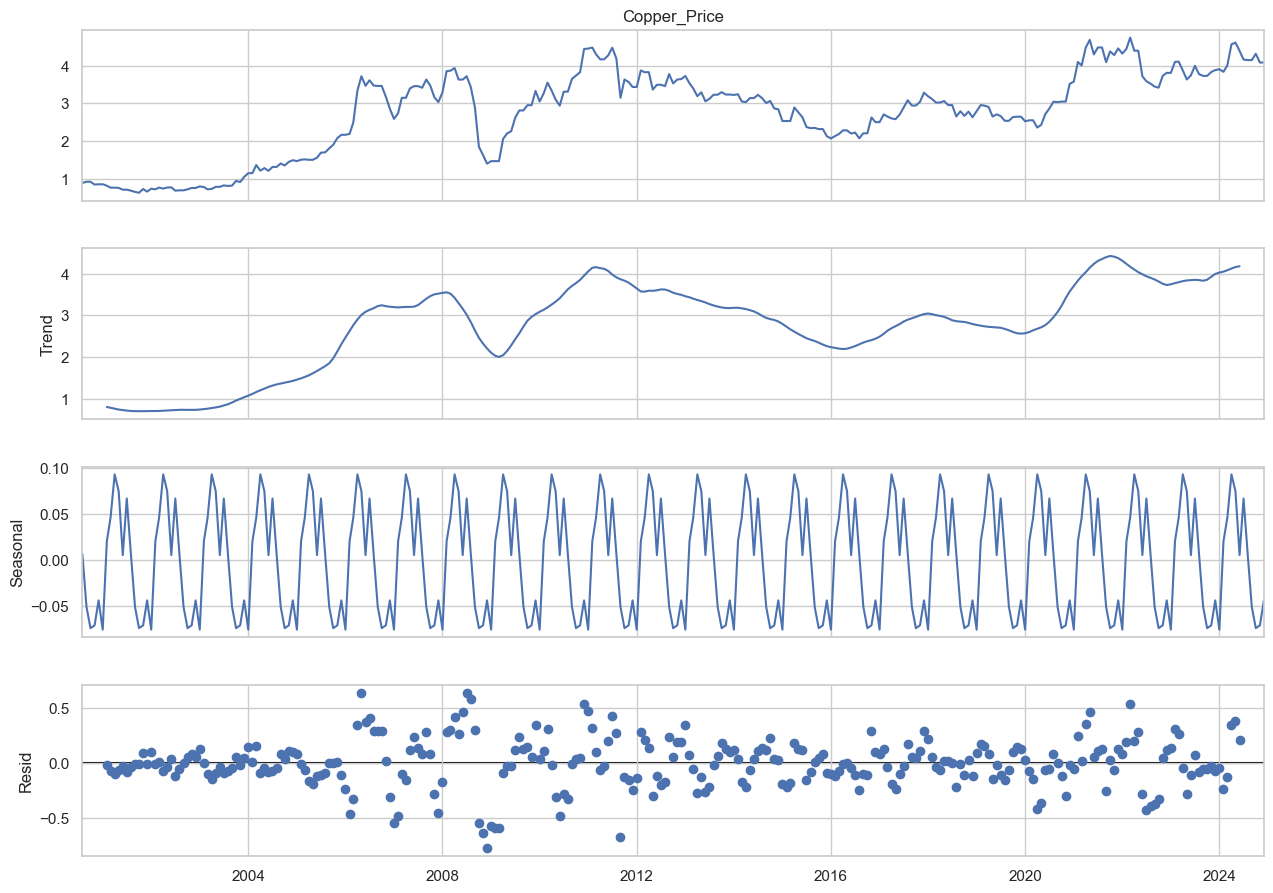

In [19]:
# Seasonal Decomposition
# Check if we have enough data and no NaNs for decomposition
clean_price = df['Copper_Price'].dropna()
if len(clean_price) >= 24: # Need at least 2 cycles
    decomp = seasonal_decompose(clean_price, model='additive', period=12)
    fig = decomp.plot()
    fig.set_size_inches(14, 10)
    plt.show()
else:
    print("Not enough data for seasonal decomposition")

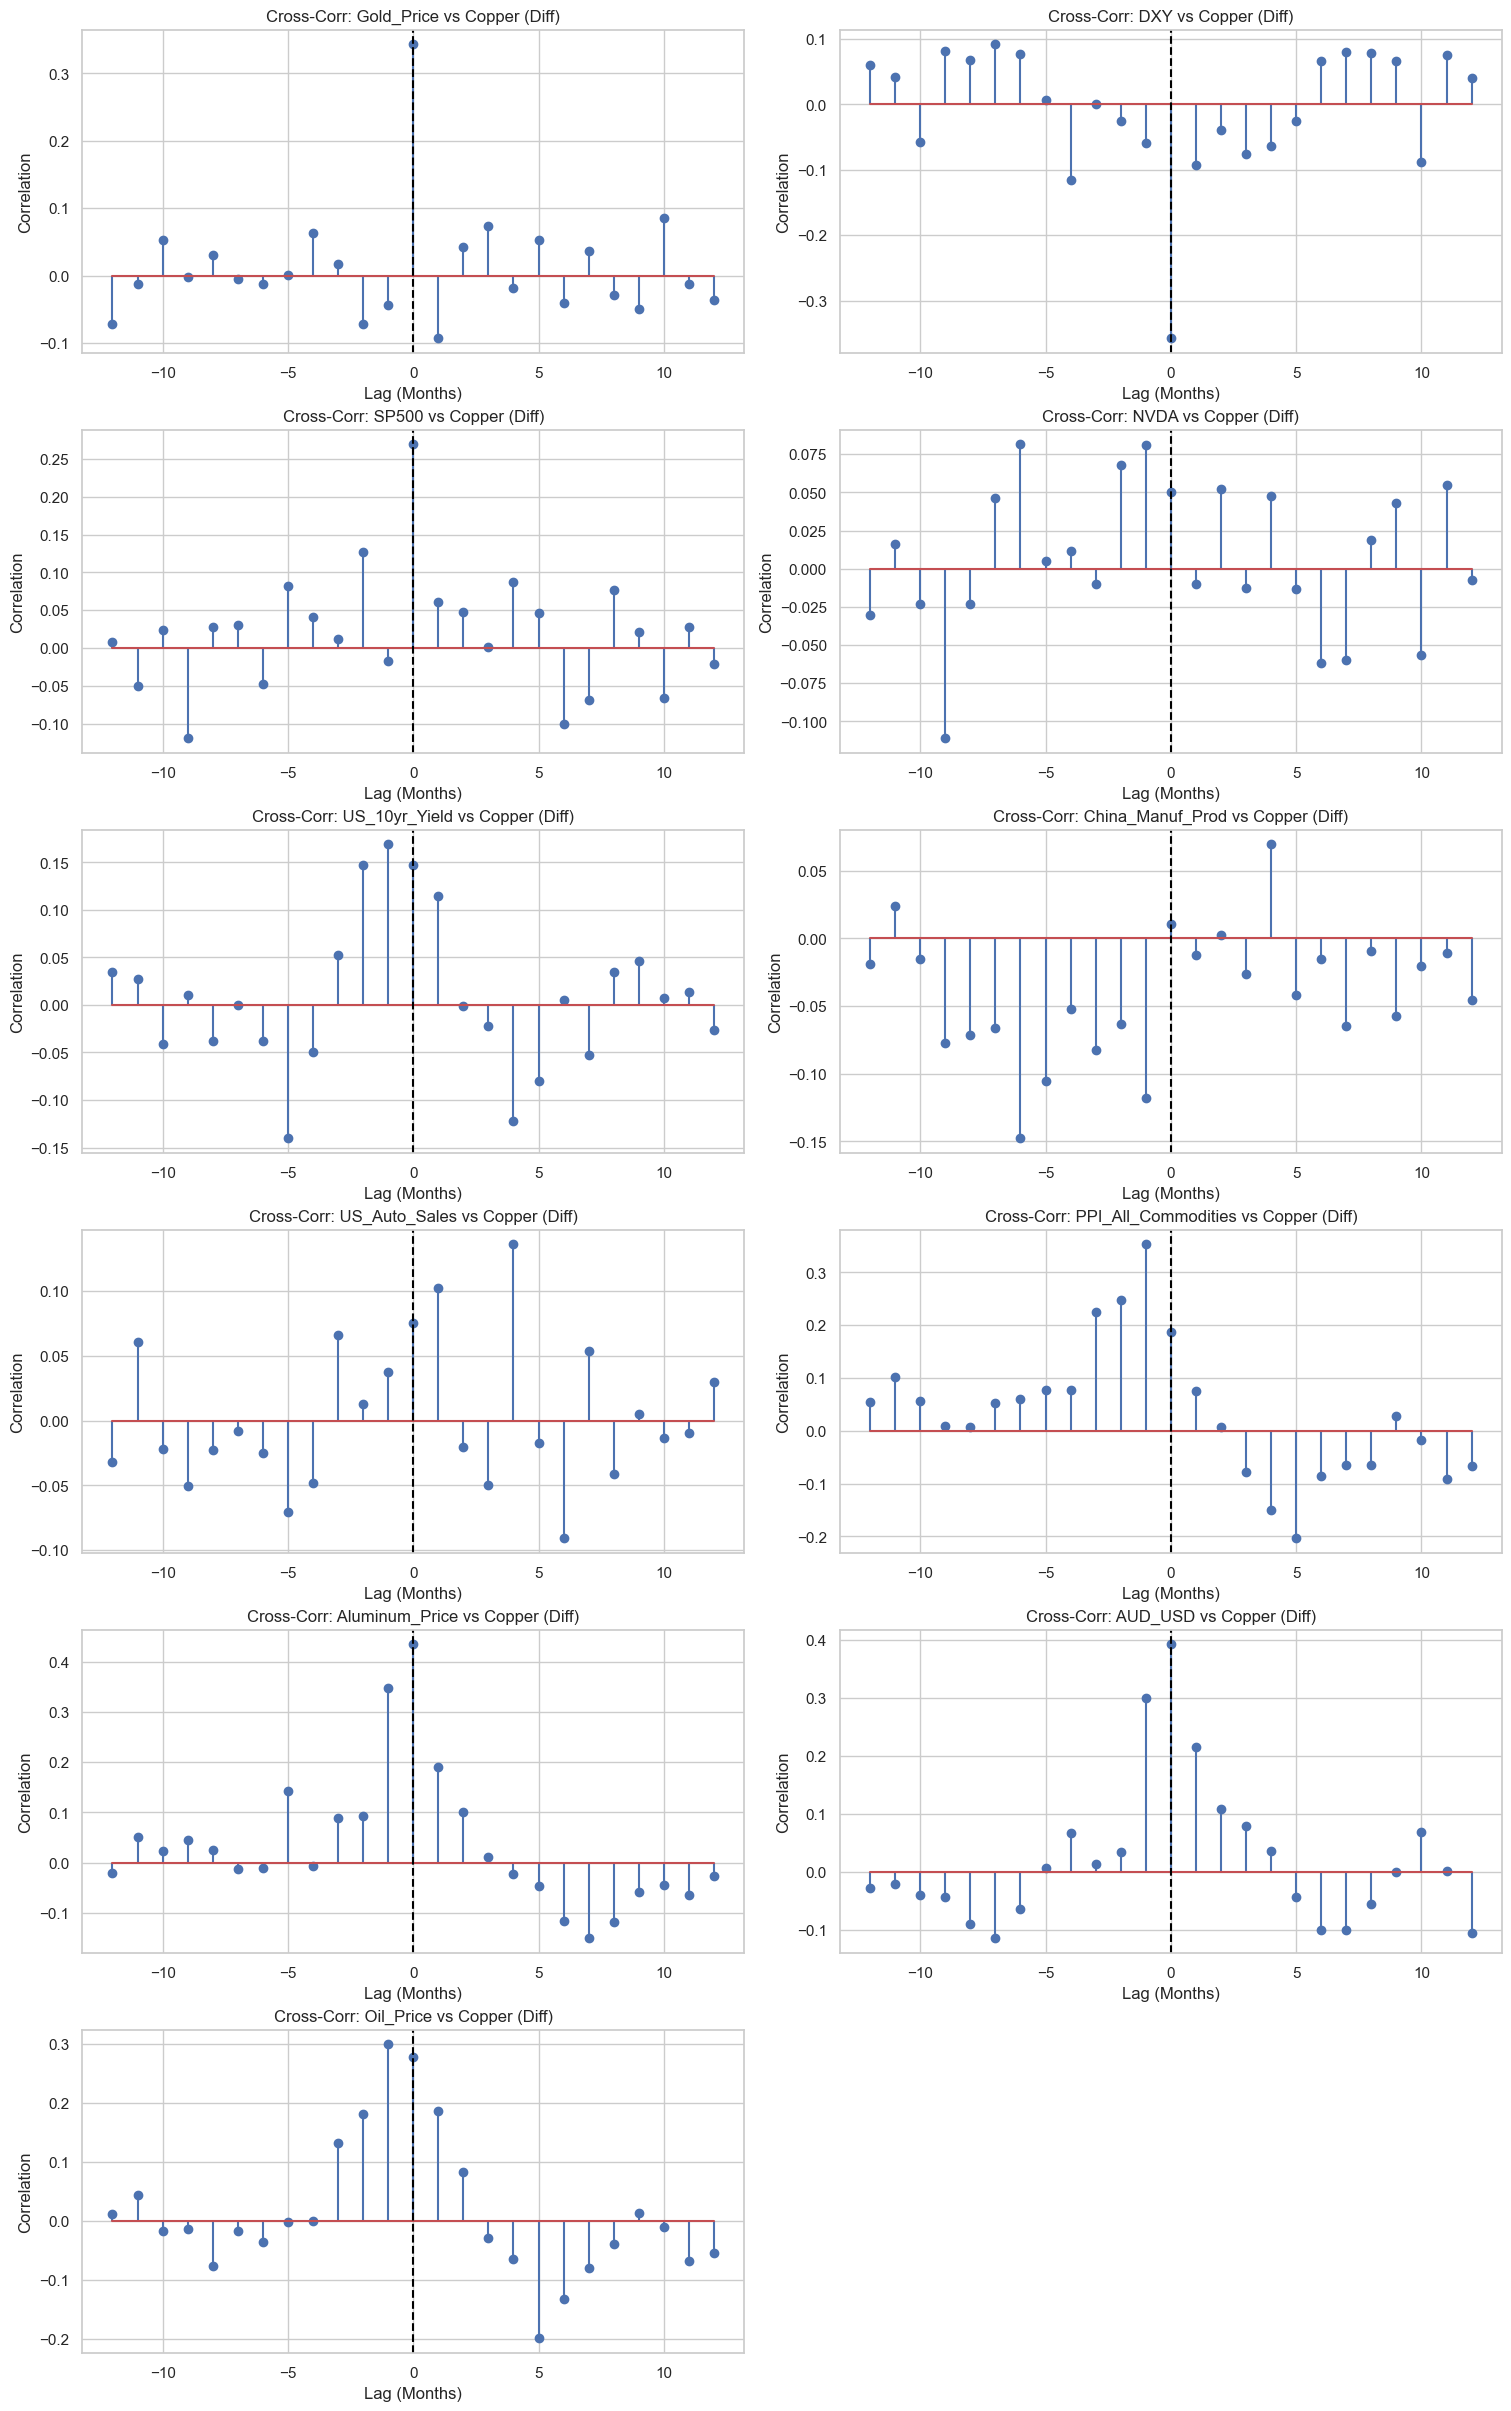

Positive Lag (Right side): Predictor LEADS Copper Price (Predictive Power)
Negative Lag (Left side): Predictor LAGS Copper Price (Reactionary)


In [ ]:
# Lead-Lag Analysis (Cross-Correlation) - Generalized for All Features
# Does [Feature X] predict Copper Price next month?
target = df['Copper_Price'].diff().dropna() # Use differenced data for stationarity

# List of potential leading indicators (exclude target and non-numeric)
features = [col for col in df.columns if col != 'Copper_Price']
n_features = len(features)

# Setup subplots
rows = (n_features // 2) + 1
fig, axes = plt.subplots(rows, 2, figsize=(15, 4 * rows), constrained_layout=True)
axes = axes.flatten()

for idx, feature_name in enumerate(features):
    predictor = df[feature_name].diff().dropna()
    
    # Align the series (intersection of dates)
    common_idx = target.index.intersection(predictor.index)
    target_aligned = target.loc[common_idx]
    predictor_aligned = predictor.loc[common_idx]
    
    # Calculate Cross-Correlation for lags -12 to +12
    lags = np.arange(-12, 13)
    corrs = [target_aligned.corr(predictor_aligned.shift(lag)) for lag in lags]
    
    # Plot
    ax = axes[idx]
    ax.stem(lags, corrs)
    ax.set_title(f'Cross-Corr: {feature_name} vs Copper (Diff)')
    ax.set_xlabel('Lag (Months)')
    ax.set_ylabel('Correlation')
    ax.axvline(0, color='black', linestyle='--')
    ax.grid(True)

# Hide any unused subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.show()
print("Positive Lag (Right side): Predictor LEADS Copper Price (Predictive Power)")
print("Negative Lag (Left side): Predictor LAGS Copper Price (Reactionary)")

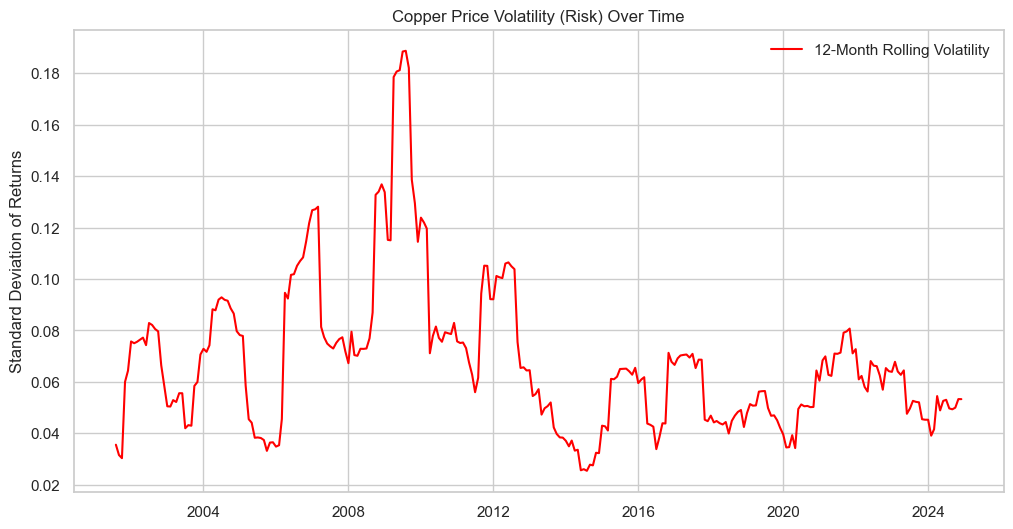

In [ ]:
# Rolling Volatility
# Calculate Rolling Standard Deviation (12 months)
roll_std = df['Copper_Price'].pct_change().rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(roll_std, color='red', label='12-Month Rolling Volatility')
plt.title('Copper Price Volatility (Risk) Over Time')
plt.ylabel('Standard Deviation of Returns')
plt.legend()
plt.show()

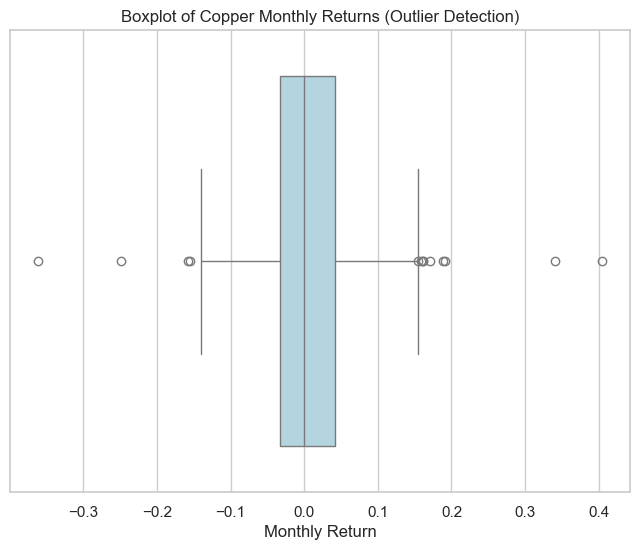

Extreme Months (Outliers > 3 std deviations):
Date
2006-04-01    3.3355
2008-10-01    1.8440
2009-04-01    2.0530
2011-09-01    3.1450
Name: Copper_Price, dtype: float64


In [ ]:
# Outlier Detection (Black Swans)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Copper_Price'].pct_change().dropna(), color='lightblue')
plt.title('Boxplot of Copper Monthly Returns (Outlier Detection)')
plt.xlabel('Monthly Return')
plt.show()

# Find outliers (Z-score > 3 or < -3)
mean_ret = df['Copper_Price'].pct_change().mean()
std_ret = df['Copper_Price'].pct_change().std()
outliers = df[np.abs((df['Copper_Price'].pct_change() - mean_ret) / std_ret) > 3]

print("Extreme Months (Outliers > 3 std deviations):")
print(outliers['Copper_Price'])

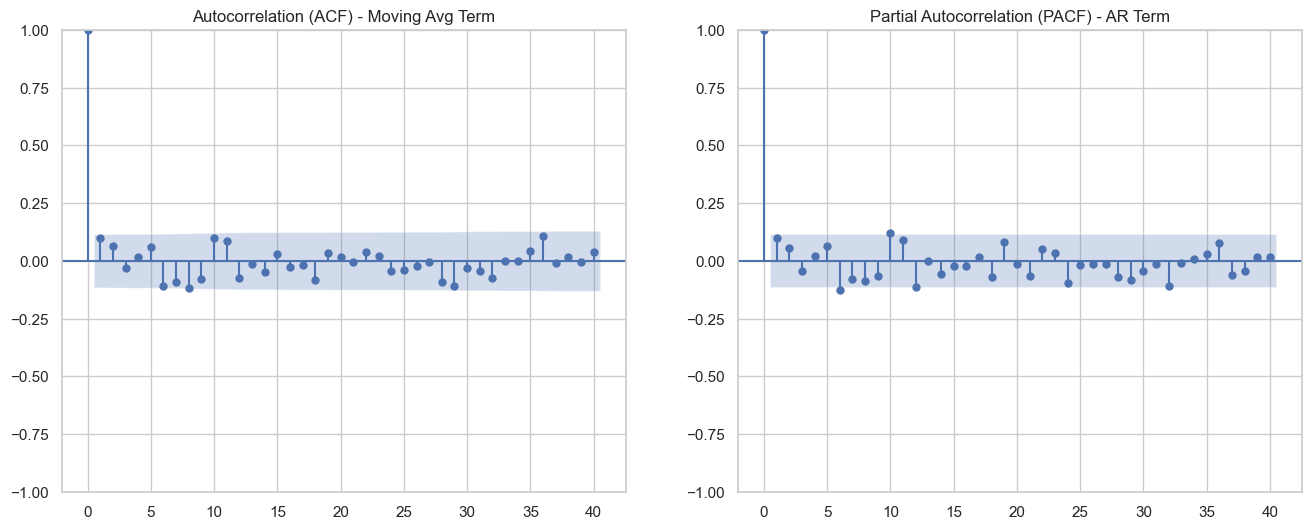

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation Analysis (ACF/PACF)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot ACF (Are past values correlated?)
plot_acf(df['Copper_Price'].diff().dropna(), lags=40, ax=ax1) # Use differenced data
ax1.set_title('Autocorrelation (ACF) - Moving Avg Term')

# Plot PACF (Which specific lags are important?)
plot_pacf(df['Copper_Price'].diff().dropna(), lags=40, ax=ax2, method='ywm')
ax2.set_title('Partial Autocorrelation (PACF) - AR Term')

plt.show()